In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import sys, os

sys.path.insert(0, ".")
os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import matplotlib
import matplotlib.pyplot as plt

from pixel_art.analysis.pixel_art_experiment import all_pixel_art_errors_above_line
from pixel_art.theme import color_by_column

In [4]:
errors = all_pixel_art_errors_above_line(0)

In [5]:
def plot_vs_acc(errors, x_col, name, ax):
    for k in errors:
        ax.scatter(errors[k][x_col], errors[k]["e2e_edit"], color=color_by_column[x_col], label=k)
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_yticks([1, 2, 5, 10, 20])
    ax.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())

    ax.set_xlabel(name)
    ax.grid()

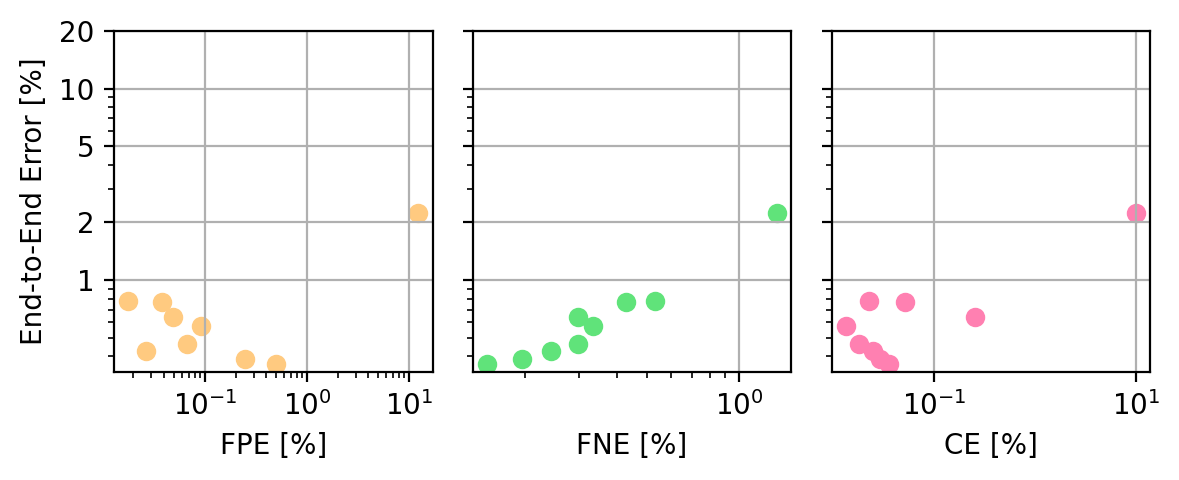

In [6]:
mt = {"MT": errors["MT"]}
_, axs = plt.subplots(1, 3, figsize=(6, 2.5), tight_layout=True, sharey=True, dpi=200)
plot_vs_acc(mt, "fpe", "FPE [%]", axs[0])
plot_vs_acc(mt, "fne", "FNE [%]", axs[1])
plot_vs_acc(mt, "ce", "CE [%]", axs[2])
axs[0].set_ylabel("End-to-End Error [%]")
plt.savefig("output/pixel_art_acc_vs_interp.png", facecolor="white")
plt.show()